In [6]:
from __future__ import print_function

import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

from matplotlib import pyplot as plt

In [2]:
"""
Variables and dataset
"""

batch_size = 128
num_classes = 10
epochs = 20

(x_A, y_A), (x_B, y_B) = mnist.load_data()
(dataset_x, dataset_y) = (np.concatenate((x_A, x_B)), np.concatenate((y_A, y_B)))

#homogenize types 
dataset_x = dataset_x.reshape(70000, 784)
dataset_x = dataset_x.astype('float32')
dataset_x /= 255

#make output to categorical
dataset_y = keras.utils.to_categorical(dataset_y, num_classes)

# We separate the dataset in 60% 20% 20%
(x_train, y_train) = (dataset_x[:42000], dataset_y[:42000])
(x_test, y_test) = (dataset_x[42000:56000], dataset_y[42000:56000])
(x_validate, y_validate) = (dataset_x[56000:70000], dataset_y[56000:72000])

print('train data: ', x_train.shape[0])
print('validation data: ', x_validate.shape[0])
print('test data: ', x_test.shape[0])

train data:  42000
validation data:  14000
test data:  14000


In [3]:
"""
Training Model
"""

model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_validate, y_validate))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 42000 samples, validate on 14000 samples
Epoch 1/20
42000/42000 [==============================] - 15s 36

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


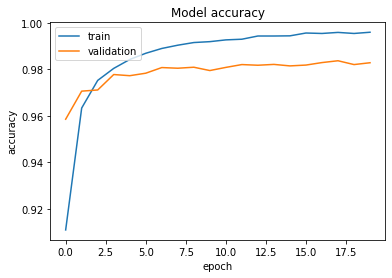

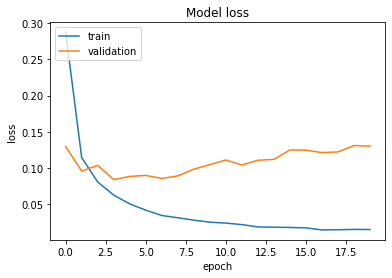

In [7]:
"""
ploting training data
"""
# get all keys of of history
print(history.history.keys())


#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()